# 题目五

In [1]:
# impoprt the package
# import the eternel pakage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib

# set the ply font to display Chinese
matplotlib.rc('font', family='Microsoft YaHei')

In [2]:
# read the data file

# get the data file path
file_path = "D:/Docunments/Projects/Advaced-Applied-Statistics/data/final_data.xlsx"

# read the data file
df = pd.read_excel(file_path, '人力资源数据')

In [3]:
# copy the data
data = df.drop(columns='应征者')

kmo = calculate_kmo(data)

bart = calculate_bartlett_sphericity(data)

print('kmo:', kmo[1], '\nbartlett:', bart[1])

kmo: 0.7833162998714789 
bartlett: 3.4343991320228585e-79


In [4]:
# calculate the correlation metrix
corr = data.corr()

# get the spc value
spc_val, spc_vector = np.linalg.eig(corr)

# creat a dataframe to store the spc_val
spc = pd.DataFrame()


spc['spc_val'] = spc_val

print(spc)

# determine the public factor number
for i in range(15):
    if spc_val[:i].sum()/spc_val.sum() >= 0.8:
        rate = spc_val[:i].sum()/spc_val.sum()
        # print(i)
        break
print('The number of public factor is', i, ', and the contribute rate is: ', rate)

     spc_val
0   7.499352
1   2.057550
2   1.462453
3   1.207363
4   0.739133
5   0.492693
6   0.351320
7   0.309948
8   0.255842
9   0.198242
10  0.149250
11  0.034853
12  0.064375
13  0.093030
14  0.084596
The number of public factor is 4 , and the contribute rate is:  0.8151145445476724


In [5]:
# creat the model
faa = FactorAnalyzer(n_factors=4, rotation=None)

faa.fit(data)

print('common factor variance\n', faa.get_communalities())
print('component matrix\n', faa.loadings_)
print('total variance explained\n', faa.get_factor_variance())

common factor variance
 [0.5509607  0.31442124 0.47206136 0.81796565 0.8759368  0.78528963
 0.69875622 0.88065825 0.66921    0.74527399 0.86315853 0.84347891
 0.90988453 0.99538236 0.75636721]
component matrix
 [[ 0.42245548  0.53024687  0.27337421 -0.12882879]
 [ 0.53646357 -0.02878806 -0.00187759  0.16061073]
 [ 0.10064275  0.27389971 -0.28752248  0.55158152]
 [ 0.60838589 -0.17468772  0.58322983  0.27777586]
 [ 0.79759263 -0.35415231 -0.31203649 -0.13035399]
 [ 0.85234676 -0.17164351 -0.17121671 -0.00423821]
 [ 0.42156289 -0.53185551  0.35283112  0.33716593]
 [ 0.87911997 -0.04187268 -0.26530558 -0.18885432]
 [ 0.35077848  0.73003651  0.09624387  0.06283527]
 [ 0.84623458  0.07682329 -0.09751402 -0.11726134]
 [ 0.86817705 -0.08629055 -0.27204366 -0.16725226]
 [ 0.90006362 -0.02038666 -0.11399215  0.14126064]
 [ 0.91235335  0.0463198  -0.04403927  0.27094447]
 [ 0.71962506 -0.11614691  0.57131696 -0.37098377]
 [ 0.63083368  0.59197162  0.08801546 -0.01545847]]
total variance explaine

    spc_val  contribution  total_contri
0  5.747118      0.383141      0.383141
1  2.727586      0.181839      0.564980
2  2.405078      0.160339      0.725319
3  1.346936      0.089796      0.815115


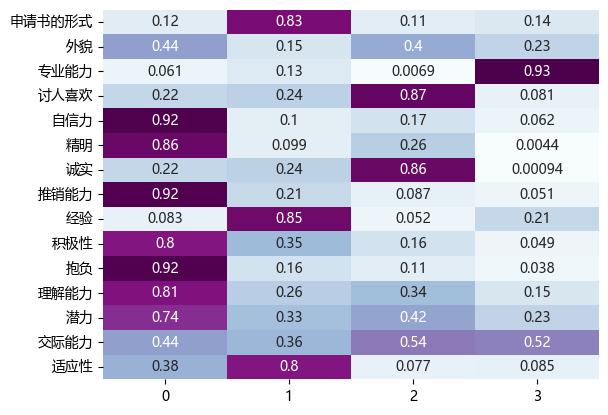

In [6]:
# rotate the factor

rotate = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal')
rotate.fit(data)

# store the contribution
contri = rotate.get_factor_variance()

info = pd.DataFrame()

info['spc_val'] = contri[0]
info['contribution'] = contri[1]
info['total_contri'] = contri[2]

factor_metrix = rotate.loadings_

print(info)

dis_info = pd.DataFrame(np.abs(factor_metrix), index=data.columns)

plt.figure()

ax = sns.heatmap(dis_info, annot=True, cmap='BuPu', cbar=False)

plt.show()

In [7]:
# factor score
f_corr = np.linalg.inv(np.mat(data.corr()))

f_sc = np.dot(f_corr, factor_metrix)

f_score = pd.DataFrame(f_sc)
f_score.columns = ['factor1', 'factor2', 'factor3', 'factor4']
f_score.index = data.columns

print(f_score)

         factor1   factor2   factor3   factor4
申请书的形式 -0.097406  0.372228  0.013257 -0.140569
外貌      0.015867 -0.008576  0.167386  0.188837
专业能力   -0.020118  0.001671  0.064120  0.697043
讨人喜欢   -0.157603  0.070452  0.478312 -0.007953
自信力     0.249474 -0.170949 -0.101216 -0.047640
精明      0.184244 -0.075041 -0.030517  0.001025
诚实     -0.092774 -0.158334  0.490262  0.079571
推销能力    0.224413 -0.026236 -0.154881 -0.062015
经验     -0.082572  0.371849 -0.050252  0.109785
积极性     0.153881  0.054989 -0.086324 -0.059555
抱负      0.225987 -0.047879 -0.141273 -0.047778
理解能力    0.125966 -0.003555  0.039222  0.108201
潜力      0.077969  0.032003  0.108541  0.173853
交际能力   -0.026369  0.125931  0.185941 -0.380800
适应性    -0.012923  0.310946 -0.044992  0.020516


In [8]:
# calulate the factor score of the people

f_sc_p = np.dot(np.mat(data), f_sc)

print(f_sc_p)

[[ 7.01199601  4.41014871  4.98687346  0.18842185]
 [ 7.77994451  6.03176179  7.43709308  2.6717811 ]
 [ 7.11814049  5.04905396  6.42048637  0.97223448]
 [ 3.10669545  4.75818932  7.828415    6.57968325]
 [ 2.06465638  6.57637642  9.96250341  6.66171368]
 [ 4.37246223  5.59459622  7.82222663  5.42002131]
 [ 6.40169518  8.46147982  7.3168476   5.44734212]
 [ 7.06877266  8.39452535  7.38807364  5.76561644]
 [ 5.52718839  8.18254449  7.80035249  4.70048342]
 [10.44095574  2.68227046  2.43852864  8.1502812 ]
 [10.13235593  2.39818252 -0.20829454  8.42266186]
 [ 9.11649874  1.58874455  4.45387758  8.47558833]
 [ 2.07163982  5.11012913 10.46650762  6.07804962]
 [ 1.88340785  5.35809127  9.72711967  6.5379457 ]
 [ 1.88852934  4.41045944  9.37116437  7.52628165]
 [ 6.51043038  6.29290739  6.45058258  4.71703277]
 [ 5.18381217  5.85757707  6.79633433  3.91224136]
 [ 4.95953521  2.4687976   5.2829799   4.83466504]
 [ 4.78081995  3.0260346   4.72444217  5.44608987]
 [ 5.95420804  3.00660552  9.40

In [9]:
# calculate the score of people

# calculate the weight
weight = info['contribution']/info['contribution'].sum()

final_score = np.dot(f_sc_p, weight)/info['contribution'].sum()

final_score = pd.DataFrame(final_score.T)

df['score'] = final_score

out = df[['应征者', 'score']].sort_values(by='score', ascending=False)

print(out)

    应征者     score
39   40  9.415775
38   39  9.262445
7     8  8.935892
6     7  8.509334
22   23  8.506479
9    10  8.444993
21   22  8.351411
1     2  8.293042
23   24  8.169923
8     9  7.944442
11   12  7.912266
15   16  7.670781
10   11  7.587355
43   44  7.443030
19   20  7.190162
2     3  7.167426
45   46  7.074793
20   21  6.836785
16   17  6.761297
5     6  6.672799
26   27  6.496585
0     1  6.479460
37   38  6.296821
4     5  6.294988
44   45  6.274478
36   37  6.108433
12   13  5.940472
3     4  5.872190
13   14  5.783512
14   15  5.574788
17   18  5.463967
18   19  5.461262
25   26  5.304473
31   32  4.929433
24   25  4.857937
35   36  4.790423
30   31  4.484396
32   33  4.475647
42   43  4.206022
29   30  3.973960
40   41  3.573076
33   34  3.119349
41   42  2.714446
46   47  2.579176
34   35  2.572474
47   48  2.420954
27   28  2.264226
28   29  1.728414
